In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
# Load datasets
df_bd = pd.read_csv("cleaned_breakdown_filtered.csv")
df_spares = pd.read_csv("spares_filtered_file2.csv")

# Display basic info
print(df_bd.info())
print(df_spares.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   equipment_id          15633 non-null  int64 
 1   model_number          15633 non-null  object
 2   description           9418 non-null   object
 3   client_id             15633 non-null  object
 4   plant_code            15633 non-null  object
 5   technical_fault_code  15592 non-null  object
 6   created_at_date       15633 non-null  object
 7   closed_at_date        12838 non-null  object
 8   city                  15633 non-null  object
 9   client_sf             15633 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11961 entries, 0 to 11960
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ticket ID       11961 non-null  in

## Data Cleaning

In [ ]:
print(df_bd.isnull().sum())
print(df_spares.isnull().sum())

equipment_id               0
model_number               0
description             6215
client_id                  0
plant_code                 0
technical_fault_code      41
created_at_date            0
closed_at_date          2795
city                       0
client_sf                  0
dtype: int64
Ticket ID         0
Equipment ID      0
Material ID       0
Material Name     0
Material Type     0
Material Group    0
Priority          0
Client ID         0
Client Name       0
Contract Type     0
Plant Code        0
Request Date      0
Approved Date     0
Billable          0
Returnable        0
dtype: int64


In [ ]:
df_bd = df_bd.fillna('NA')
print(df_bd.isnull().sum())

equipment_id            0
model_number            0
description             0
client_id               0
plant_code              0
technical_fault_code    0
created_at_date         0
closed_at_date          0
city                    0
client_sf               0
dtype: int64


In [ ]:
df_bd.columns = df_bd.columns.str.lower().str.replace(' ', '_')
df_spares.columns = df_spares.columns.str.lower().str.replace(' ', '_')

In [ ]:
df_spares.columns  #validation

Index(['ticket_id', 'equipment_id', 'material_id', 'material_name',
       'material_type', 'material_group', 'priority', 'client_id',
       'client_name', 'contract_type', 'plant_code', 'request_date',
       'approved_date', 'billable', 'returnable'],
      dtype='object')

In [ ]:
df_spares.head(2)

,ticket_id,equipment_id,material_id,material_name,material_type,material_group,priority,client_id,client_name,contract_type,plant_code,request_date,approved_date,billable,returnable
0,29324,10004065,AREOTH00014,Capillary Fitting & Charging Pin,ZRAW,OTH,2,PUKIR00001,Kirloskar Oil Engines Ltd,S1( AMC  Comprehensive ),IN03,01-01-2024 14:35,16-04-2024 14:43,No,Yes
1,29324,10004065,LREGAS00003,Refrigerant Gas R 407 C,ZRAW,GAS,2,PUKIR00001,Kirloskar Oil Engines Ltd,S1( AMC  Comprehensive ),IN03,01-01-2024 14:35,16-04-2024 14:43,No,Yes


In [ ]:
df_bd.columns

Index(['equipment_id', 'model_number', 'description', 'client_id',
       'plant_code', 'technical_fault_code', 'created_at_date',
       'closed_at_date', 'city', 'client_sf'],
      dtype='object')

In [ ]:
df_bd.head(2)

,equipment_id,model_number,description,client_id,plant_code,technical_fault_code,created_at_date,closed_at_date,city,client_sf
0,10000001,FSEC01600CWDFR0,Airflow Alarm,MUNIK00002,IN02,BO5 - BLOWER NOT WORKING.,2021-01-23,2021-02-09,MU,NIK
1,10000001,FSEC01600CWDFR0,Airflow alarm,MUNIK00002,IN02,K06 - BIG CNTRLR INPUT CARD FAILURE,2022-04-20,2022-05-16,MU,NIK


## Data analysis starts from here.

Top 20 failed equipment

/tmp/ipython-input-11-3020644441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_failing_equipment.index, y=top_failing_equipment.values, palette="coolwarm")


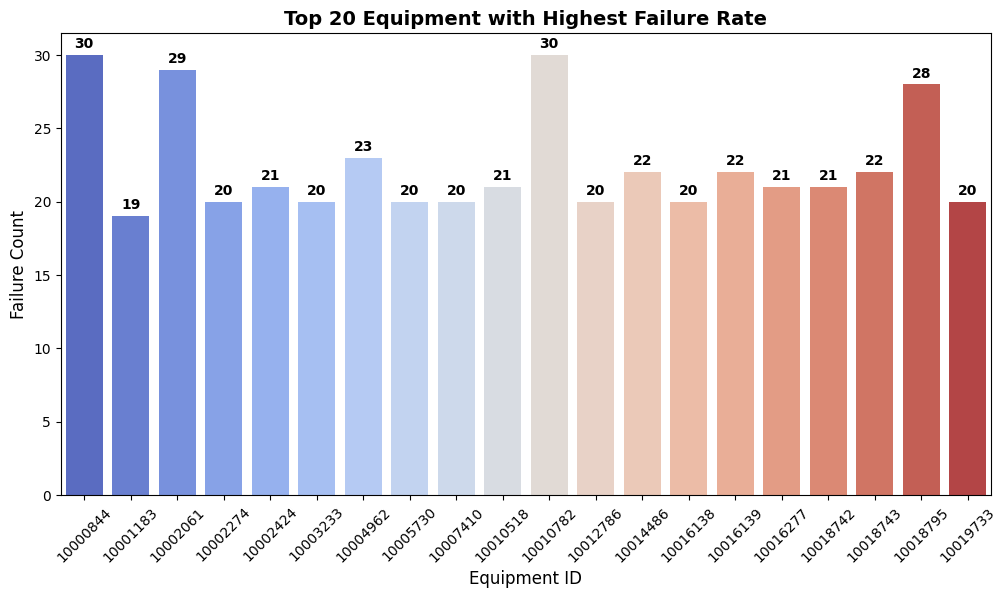

In [ ]:
# Count failures per equipment
failure_rate = df_bd['equipment_id'].value_counts()

# Identify top failing equipment
top_failing_equipment = failure_rate.head(20)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_failing_equipment.index, y=top_failing_equipment.values, palette="coolwarm")

plt.title("Top 20 Equipment with Highest Failure Rate", fontsize=14, fontweight="bold")
plt.xlabel("Equipment ID", fontsize=12)
plt.ylabel("Failure Count", fontsize=12)
plt.xticks(rotation=45)

# Add values on bars with proper alignment
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black', fontweight='bold')

plt.show()


Average resolution time per equipment

In [ ]:
# Convert dates (no need to set format since it's already in YYYY-MM-DD)
df_bd['created_at_date'] = pd.to_datetime(df_bd['created_at_date'], errors='coerce')
df_bd['closed_at_date'] = pd.to_datetime(df_bd['closed_at_date'], errors='coerce')

# Calculate resolution time (in days)
df_bd['resolution_time'] = (df_bd['closed_at_date'] - df_bd['created_at_date']).dt.days

# Remove invalid (negative) values
df_bd.loc[df_bd['resolution_time'] < 0, 'resolution_time'] = np.nan

# Count failure rate
failure_rate = df_bd['equipment_id'].value_counts()
top_failed_equipment = failure_rate.head(20).index

# Compute average resolution time
avg_resolution_time = df_bd.groupby('equipment_id')['resolution_time'].mean()

# Display result
print("Average resolution time per most failed equipment (in days):\n")
print(avg_resolution_time.loc[top_failed_equipment].sort_values(ascending=False).round(1))


Average resolution time per most failed equipment (in days):

equipment_id
10012786    275.9
10004962    128.8
10016277    117.0
10018742    115.4
10001183    113.2
10018795    101.7
10014486     89.9
10005730     89.0
10002424     88.8
10007410     71.6
10018743     66.2
10016139     62.6
10000844     54.2
10019733     53.6
10010782     53.5
10002061     52.6
10010518     44.4
10003233     30.6
10002274     29.8
10016138     27.5
Name: resolution_time, dtype: float64


Most Frequent Breakdown Causes

/tmp/ipython-input-13-1219943748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=common_faults.index, y=common_faults.values, palette="viridis")


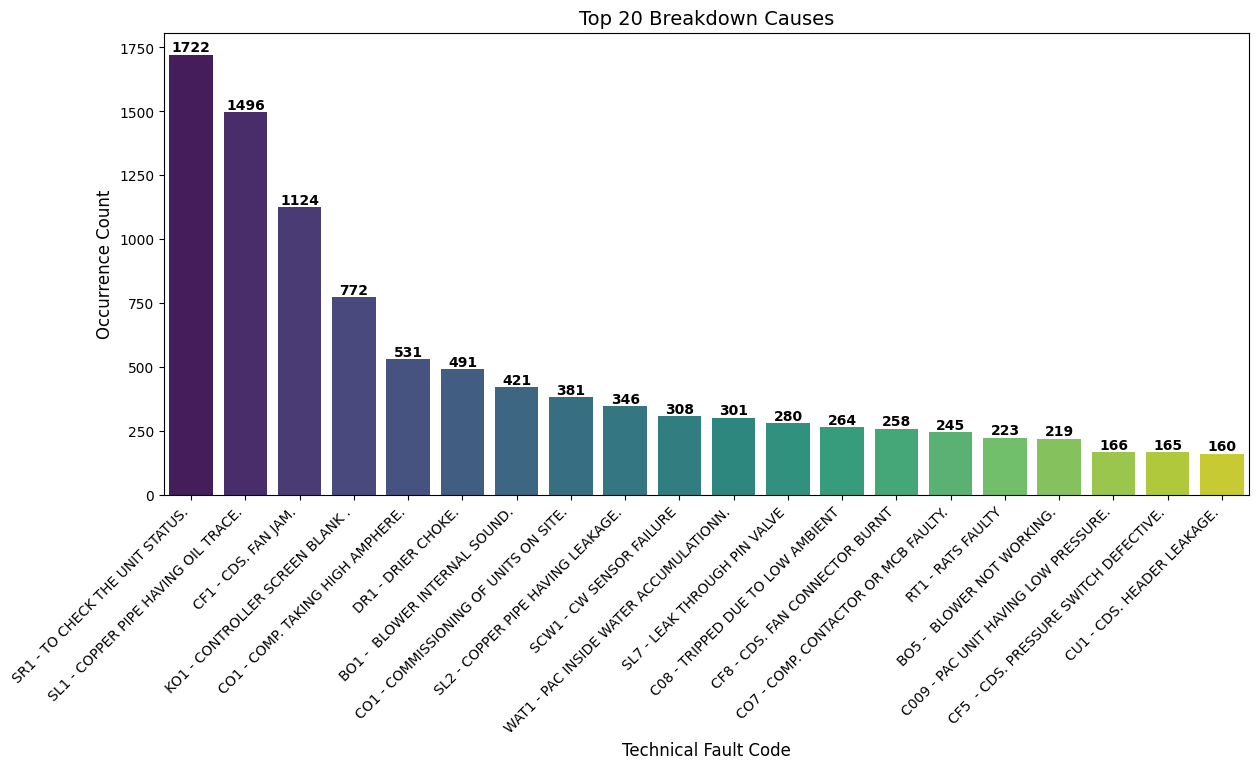

In [ ]:
# Top 20 causes of breakdowns
common_faults = df_bd['technical_fault_code'].value_counts().head(20)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=common_faults.index, y=common_faults.values, palette="viridis")

plt.title("Top 20 Breakdown Causes", fontsize=14)
plt.xlabel("Technical Fault Code", fontsize=12)
plt.ylabel("Occurrence Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, fontweight="bold", color="black")

plt.show()


Pareto Analysis (80/20 rule)

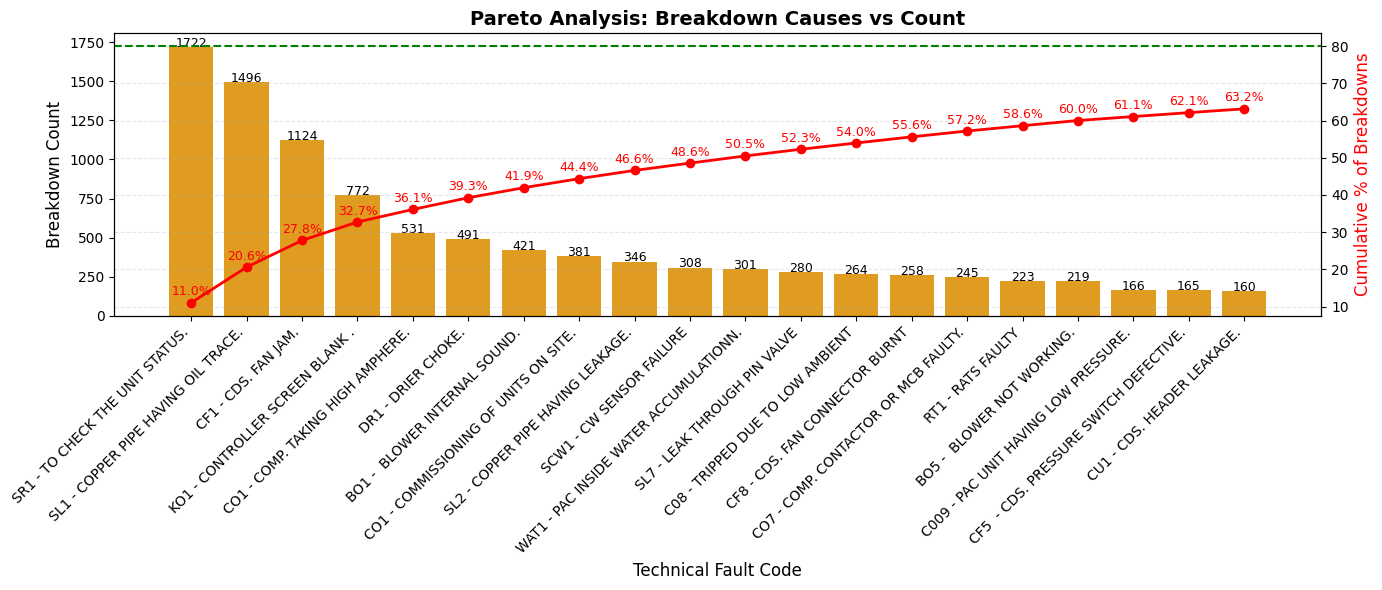

In [ ]:
# Step 1: Count breakdowns by fault code
fault_counts = df_bd['technical_fault_code'].value_counts().dropna()
pareto_fault_df = fault_counts.reset_index()
pareto_fault_df.columns = ['technical_fault_code', 'count']

# Step 2: Calculate cumulative %
pareto_fault_df = pareto_fault_df.sort_values(by='count', ascending=False).reset_index(drop=True)
pareto_fault_df['cumulative_count'] = pareto_fault_df['count'].cumsum()
pareto_fault_df['cumulative_percent'] = 100 * pareto_fault_df['cumulative_count'] / pareto_fault_df['count'].sum()

# Step 3: Plot Pareto chart
plt.figure(figsize=(14, 6))
x = range(len(pareto_fault_df.head(20)))  # numeric positions

# Bar chart for fault counts
ax = sns.barplot(x=x, y=pareto_fault_df['count'].head(20), color='orange')

# Add count labels
for i, val in enumerate(pareto_fault_df['count'].head(20)):
    ax.text(i, val + 0.5, str(int(val)), ha='center', fontsize=9)

# Line chart for cumulative %
ax2 = ax.twinx()
ax2.plot(x, pareto_fault_df['cumulative_percent'].head(20), color='red', marker='o', linewidth=2)
ax2.axhline(80, color='green', linestyle='--', linewidth=1.5)

# Add % labels
for i, cp in enumerate(pareto_fault_df['cumulative_percent'].head(20)):
    ax2.annotate(f'{cp:.1f}%', (i, cp + 2), color='red', fontsize=9, ha='center')

# Formatting
ax.set_title("Pareto Analysis: Breakdown Causes vs Count", fontsize=14, fontweight='bold')
ax.set_xlabel("Technical Fault Code", fontsize=12)
ax.set_ylabel("Breakdown Count", fontsize=12)
ax2.set_ylabel("Cumulative % of Breakdowns", fontsize=12, color='red')

# X-axis fault code labels
ax.set_xticks(x)
ax.set_xticklabels(pareto_fault_df['technical_fault_code'].head(20), rotation=45, ha='right')

plt.grid(True, linestyle='--', axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Most spare parts consumed

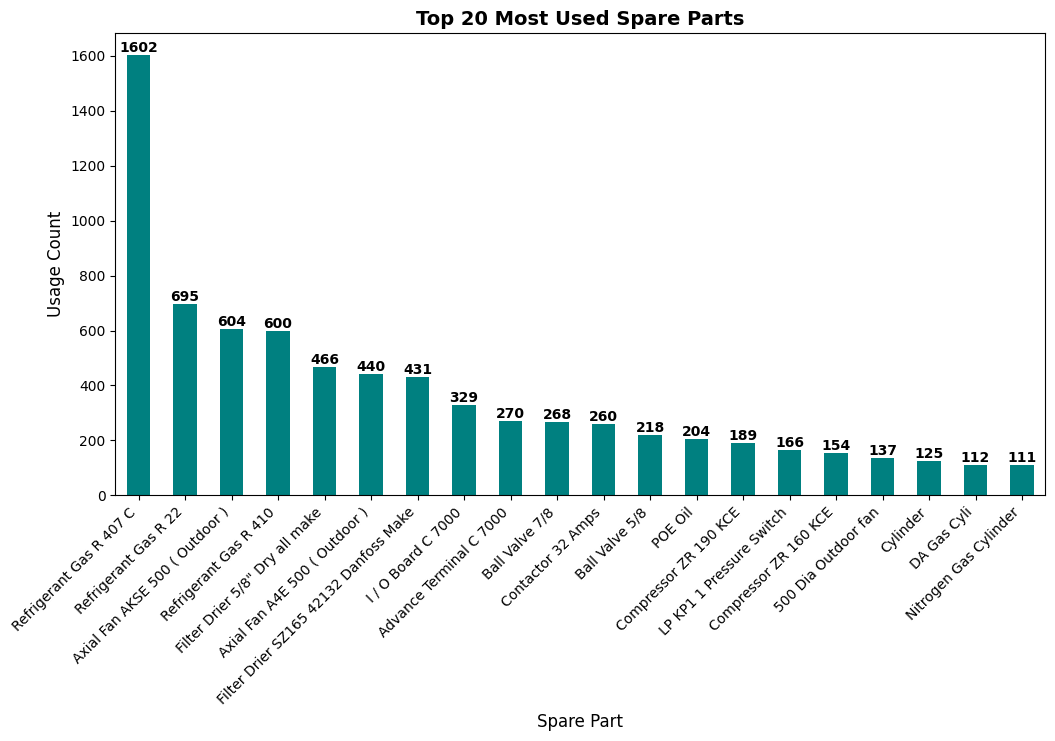

In [ ]:
spare_usage_count = df_spares['material_name'].value_counts()
# Visualization
plt.figure(figsize=(12, 6))
ax = spare_usage_count.head(20).plot(kind='bar', color='teal')

plt.title("Top 20 Most Used Spare Parts", fontsize=14, fontweight="bold")
plt.xlabel("Spare Part", fontsize=12)
plt.ylabel("Usage Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")

plt.show()


Year wise spare consumption analysis

In [ ]:
# Convert request date to datetime
df_spares['request_date'] = pd.to_datetime(df_spares['request_date'], errors='coerce', dayfirst=True, infer_datetime_format=True)

# Extract year
df_spares['year'] = df_spares['request_date'].dt.year

# Count spare part usage per year
spare_usage_yearly = df_spares.groupby(['year', 'material_name']).size()

# Display top spare parts for each year
for year, data in spare_usage_yearly.groupby(level=0):
    print(f"\nMost Used Spare Parts in {year}:")
    print(data.sort_values(ascending=False).head(5))


Most Used Spare Parts in 2020:
year  material_name                 
2020  Refrigerant Gas R 407 C           374
      Refrigerant Gas R 22              246
      Filter Drier 5/8" Dry all make    152
      Axial Fan AKSE 500 ( Outdoor )    134
      Axial Fan A4E 500 ( Outdoor )     116
dtype: int64

Most Used Spare Parts in 2021:
year  material_name                 
2021  Refrigerant Gas R 407 C           330
      Refrigerant Gas R 22              193
      Axial Fan AKSE 500 ( Outdoor )    131
      Filter Drier 5/8" Dry all make    121
      Refrigerant Gas R 410             118
dtype: int64

Most Used Spare Parts in 2022:
year  material_name                        
2022  Refrigerant Gas R 407 C                  288
      Axial Fan AKSE 500 ( Outdoor )           136
      Refrigerant Gas R 410                     97
      Refrigerant Gas R 22                      95
      Filter Drier SZ165 42132 Danfoss Make     67
dtype: int64

Most Used Spare Parts in 2023:
year  material_name 

/tmp/ipython-input-16-2741288081.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_spares['request_date'] = pd.to_datetime(df_spares['request_date'], errors='coerce', dayfirst=True, infer_datetime_format=True)


In [ ]:
# Step 1: Ensure datetime and extract year
df_spares['request_date'] = pd.to_datetime(df_spares['request_date'], errors='coerce', dayfirst=True)
df_spares['year'] = df_spares['request_date'].dt.year

# Step 2: Create year-wise pivot of 'Yes'/'No'
spare_year_pivot = (
    df_spares.groupby(['material_name', 'year'])
    .size()
    .unstack(fill_value=0)
    .applymap(lambda x: 'Yes' if x > 0 else 'No')
)

# Step 3: Calculate number of years present per spare
year_counts = (spare_year_pivot == 'Yes').sum(axis=1)

# Step 4: Calculate total usage count per spare (across all years)
total_usage = df_spares['material_name'].value_counts()

# Step 5: Combine all info
spare_year_pivot['year_count'] = year_counts
spare_year_pivot['total_usage'] = spare_year_pivot.index.map(total_usage)

# Step 6: Sort by year_count (desc), then total_usage (desc)
sorted_df = spare_year_pivot.sort_values(by=['year_count', 'total_usage'], ascending=[False, False])

# Step 7: Drop helper columns before showing
final_table = sorted_df.drop(columns=['year_count', 'total_usage'])

# Step 8: Paginate with tabulate
batch_size = 20
total_rows = len(final_table)

for start in range(0, total_rows, batch_size):
    end = start + batch_size
    batch = final_table.iloc[start:end]

    print(f"\n🔧 Spare Usage Grid Sorted (Rows {start+1} to {min(end, total_rows)} of {total_rows})")
    print(tabulate(batch.reset_index(), headers="keys", tablefmt="fancy_grid"))

    user_input = input("Press Enter to view next batch or type 'q' to quit: ").strip().lower()
    if user_input == 'q':
        print("Exiting pagination early. ✅")
        break


/tmp/ipython-input-17-1411724417.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: 'Yes' if x > 0 else 'No')



🔧 Spare Usage Grid Sorted (Rows 1 to 20 of 388)
╒════╤═══════════════════════════════════════╤════════╤════════╤════════╤════════╤════════╤════════╕
│    │ material_name                         │ 2020   │ 2021   │ 2022   │ 2023   │ 2024   │ 2025   │
╞════╪═══════════════════════════════════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│  0 │ Refrigerant Gas R 407 C               │ Yes    │ Yes    │ Yes    │ Yes    │ Yes    │ Yes    │
├────┼───────────────────────────────────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  1 │ Refrigerant Gas R 22                  │ Yes    │ Yes    │ Yes    │ Yes    │ Yes    │ Yes    │
├────┼───────────────────────────────────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  2 │ Axial Fan AKSE 500 ( Outdoor )        │ Yes    │ Yes    │ Yes    │ Yes    │ Yes    │ Yes    │
├────┼───────────────────────────────────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  3 │ Refrigerant Gas R 410              

Breakdown Trend Over Time (Monthly Breakdown Count)

Correlation between breakdowns and spare parts usage: 0.75


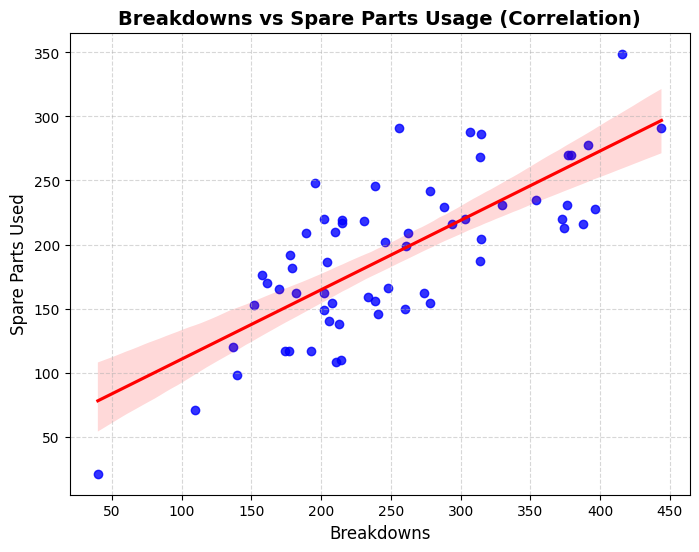

In [ ]:
# Extract year-month for trend analysis
df_bd['month_year'] = df_bd['created_at_date'].dt.to_period('M')

# Aggregate breakdown and spare usage per month
breakdown_per_month = df_bd.groupby('month_year').size()

# Extract year-month from request_date in df_spares
df_spares['month_year'] = df_spares['request_date'].dt.to_period('M')
spares_per_month = df_spares.groupby('month_year').size()

# Merge into a single dataframe
correlation_df = pd.DataFrame({'breakdowns': breakdown_per_month, 'spares_used': spares_per_month})

# Drop NaN values (if any)
correlation_df.dropna(inplace=True)

# Calculate correlation
correlation_value = correlation_df.corr().iloc[0, 1]
print(f"Correlation between breakdowns and spare parts usage: {correlation_value:.2f}")

# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
sns.regplot(x=correlation_df['breakdowns'], y=correlation_df['spares_used'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title("Breakdowns vs Spare Parts Usage (Correlation)", fontsize=14, fontweight="bold")
plt.xlabel("Breakdowns", fontsize=12)
plt.ylabel("Spare Parts Used", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Seasonal breakdown analysis

/tmp/ipython-input-21-3447797748.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_breakdown.index, y=seasonal_breakdown.values, palette="Set1")


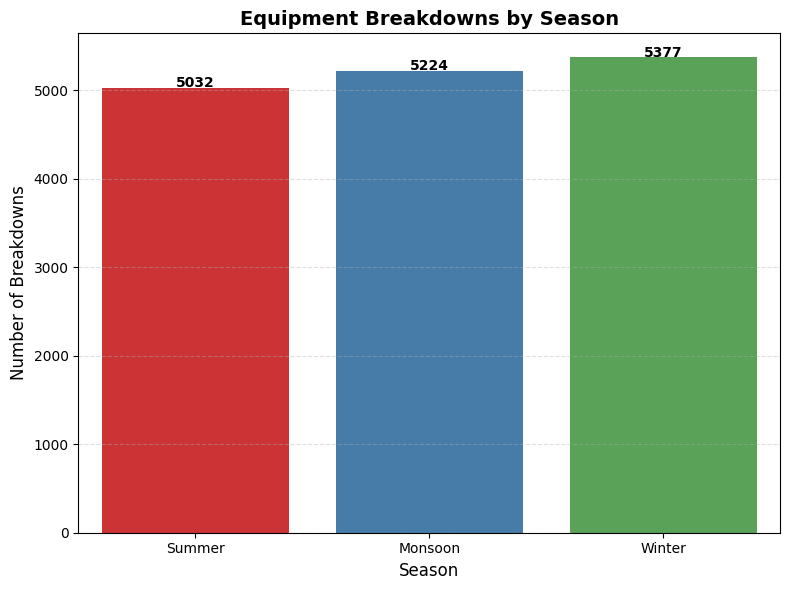

In [ ]:
# Define a function to map month to season
def map_season(month):
    if month in [2, 3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Winter'

# Extract month from breakdown date
df_bd['month'] = df_bd['created_at_date'].dt.month

# Map to season
df_bd['season'] = df_bd['month'].apply(map_season)

# Count breakdowns per season
seasonal_breakdown = df_bd['season'].value_counts().reindex(['Summer', 'Monsoon', 'Winter'])

# Plot seasonal breakdowns
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_breakdown.index, y=seasonal_breakdown.values, palette="Set1")

plt.title("Equipment Breakdowns by Season", fontsize=14, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Breakdowns", fontsize=12)

# Add values on bars
for i, v in enumerate(seasonal_breakdown.values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', linestyle="--", alpha=0.4)
plt.show()


Client-Based Breakdown Analysis

/tmp/ipython-input-22-90427729.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_clients.index, y=top_clients.values, palette="magma")


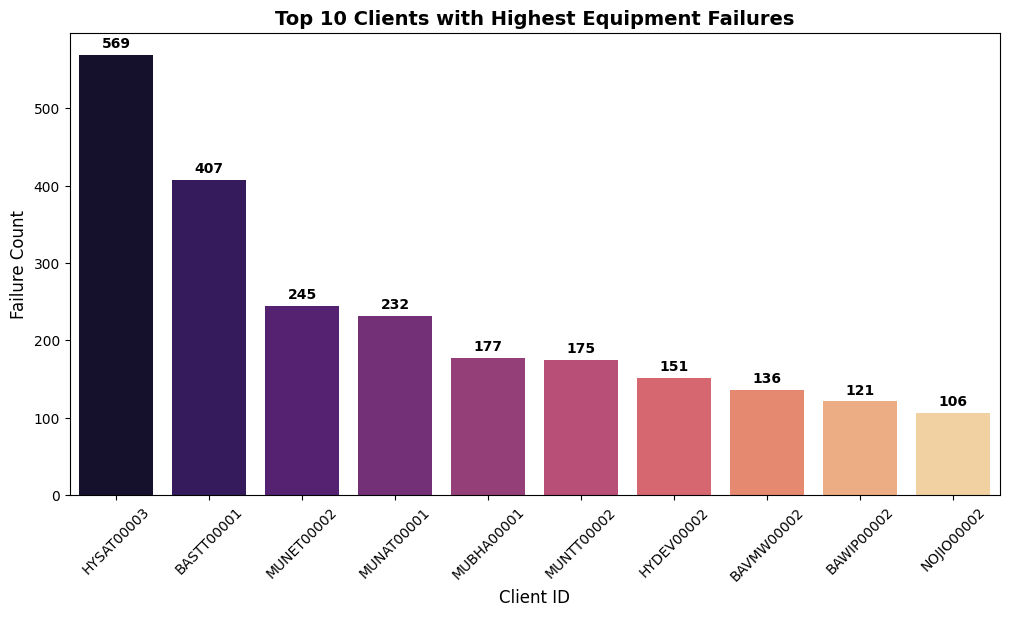

In [ ]:
# Count failures per client
failures_by_client = df_bd['client_id'].value_counts()

# Identify top clients with most failures
top_clients = failures_by_client.head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_clients.index, y=top_clients.values, palette="magma")

plt.title("Top 10 Clients with Highest Equipment Failures", fontsize=14, fontweight="bold")
plt.xlabel("Client ID", fontsize=12)
plt.ylabel("Failure Count", fontsize=12)
plt.xticks(rotation=45)

# Add values on bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black', fontweight='bold')

plt.show()


Spare Part Consumption Across Clients

/tmp/ipython-input-24-2149470403.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_spare_clients.index, y=top_spare_clients.values, palette="inferno")


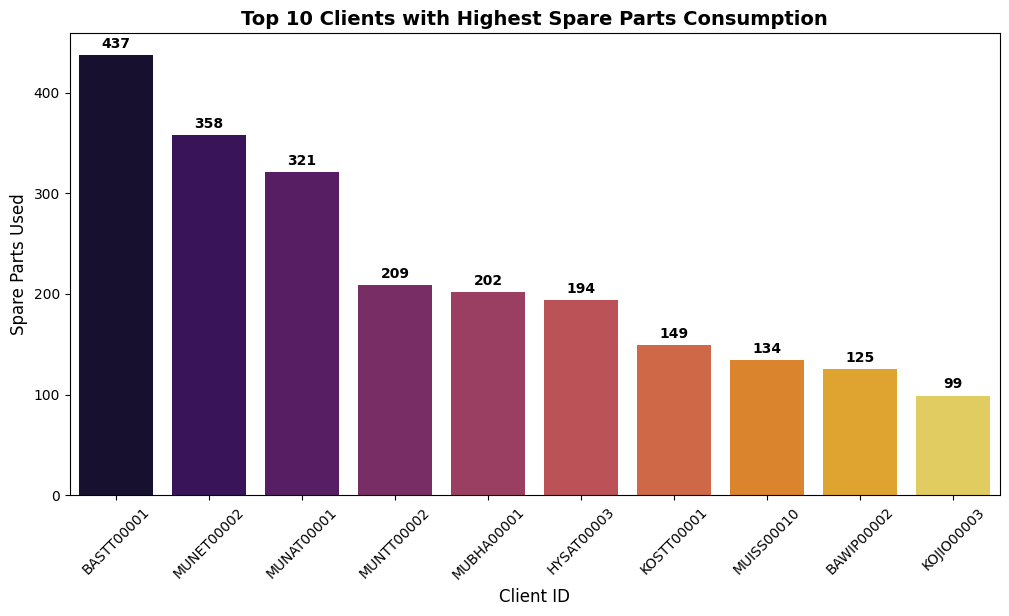

In [ ]:
# Count spare part usage per client
spares_by_client = df_spares.groupby('client_id')['material_name'].count().sort_values(ascending=False)

# Identify top clients
top_spare_clients = spares_by_client.head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_spare_clients.index, y=top_spare_clients.values, palette="inferno")

plt.title("Top 10 Clients with Highest Spare Parts Consumption", fontsize=14, fontweight="bold")
plt.xlabel("Client ID", fontsize=12)
plt.ylabel("Spare Parts Used", fontsize=12)
plt.xticks(rotation=45)

# Add values on bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black', fontweight='bold')

plt.show()


City-Based Breakdown Analysis

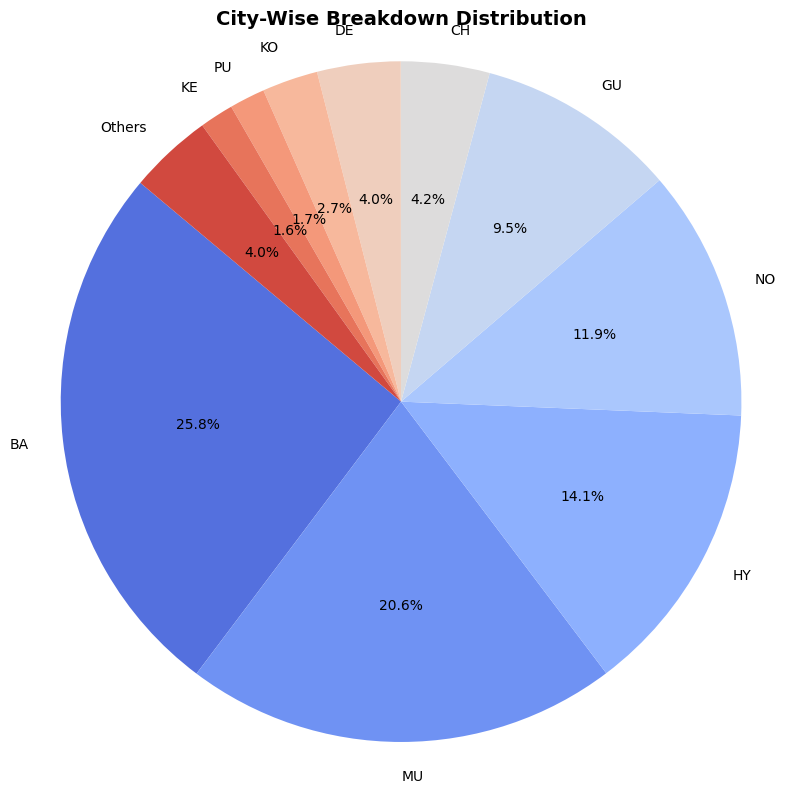

In [ ]:
# Count failures per city (full data)
failures_by_city = df_bd['city'].value_counts()

# Separate top 10 cities
top_10_cities = failures_by_city.head(10)
top_10_total = top_10_cities.sum()

# Calculate total failures
total_failures = failures_by_city.sum()

# Calculate "Others"
others = total_failures - top_10_total

# Combine top 10 with "Others" using pd.concat

pie_data = pd.concat([top_10_cities, pd.Series({'Others': others})])


# Pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("coolwarm", len(pie_data))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10}
)

plt.title("City-Wise Breakdown Distribution", fontsize=14, fontweight="bold")
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()

Spare Parts  Consumption List per Equipment

In [ ]:
#Identify Most Failed Equipment
most_failed_equipment = df_bd['equipment_id'].value_counts().head(20).index

#Filter Spare Parts Data for Most Failed Equipment
spares_used_filtered = df_spares[df_spares['equipment_id'].isin(most_failed_equipment)]

#Aggregate spare parts as a concatenated string for each equipment
spares_summary = (
    spares_used_filtered.groupby('equipment_id')['material_name']
    .apply(lambda x: ', '.join(x.unique()))  # Join unique spare parts into a single string
    .reset_index()
    .rename(columns={'spare_part_used': 'all_spares_used'})  # Rename column
)

#Display results
print(tabulate(spares_summary, headers="keys", tablefmt="fancy_grid"))


╒════╤════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │   equipment_id │ material_name                                                                                                                                                                                                                                                                                                                          │
╞════╪════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════